# 2023 MCM Problem C - Wordle数据预处理

## 题目简介
Wordle是《纽约时报》每日推出的5字母单词猜谜游戏，本题需要分析2022年的游戏数据，完成以下任务：
1. 预测每日报告结果数量的变化
2. 分析单词属性与困难模式占比的关联
3. 预测未来某日期的结果分布
4. 建立单词难度分类模型

## 预处理目标
- 数据加载与结构探索
- 数据质量检查与清洗
- 单词属性特征工程
- 时间特征提取
- 保存处理后数据

---
## 第一步：数据加载与初探

In [3]:
# 标准导入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ 库导入完成")

✅ 库导入完成


In [4]:
# 读取Excel数据（表头在第二行，即header=1）
df = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)

# 删除空列
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in str(col)])

print(f"✅ 数据加载成功")
print(f"📏 数据形状: {df.shape[0]} 行 × {df.shape[1]} 列")

✅ 数据加载成功
📏 数据形状: 359 行 × 12 列


In [5]:
# 查看数据结构
print("📋 数据结构信息:")
df.info()

📋 数据结构信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         359 non-null    datetime64[ns]
 1   Contest number               359 non-null    int64         
 2   Word                         359 non-null    object        
 3   Number of  reported results  359 non-null    int64         
 4   Number in hard mode          359 non-null    int64         
 5   1 try                        359 non-null    int64         
 6   2 tries                      359 non-null    int64         
 7   3 tries                      359 non-null    int64         
 8   4 tries                      359 non-null    int64         
 9   5 tries                      359 non-null    int64         
 10  6 tries                      359 non-null    int64         
 11  7 or more tries (X)          359 no

In [6]:
# 查看前10行数据
print("📊 数据预览 (前10行):")
df.head(10)

📊 数据预览 (前10行):


,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3
5,2022-12-26,555,judge,20011,2043,0,2,8,16,26,33,14
6,2022-12-25,554,extra,15554,1562,1,5,20,35,28,10,1
7,2022-12-24,553,poise,20281,1911,2,11,34,32,15,6,1
8,2022-12-23,552,aorta,21937,2112,0,7,26,35,20,10,3
9,2022-12-22,551,excel,20490,2034,0,1,13,34,34,15,2


In [7]:
# 查看数据统计摘要
print("📈 数值型变量统计摘要:")
df.describe()

📈 数值型变量统计摘要:


,Date,Contest number,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
count,359,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00,359.00
mean,2022-07-05 00:00:00,381.00,90918.88,5098.35,0.47,5.84,22.73,32.93,23.64,11.56,2.81
min,2022-01-07 00:00:00,202.00,2569.00,1362.00,0.00,0.00,4.00,11.00,9.00,2.00,0.00
25%,2022-04-06 12:00:00,291.50,30308.50,2848.50,0.00,3.00,17.00,30.00,19.00,7.00,1.00
50%,2022-07-05 00:00:00,381.00,44578.00,3548.00,0.00,5.00,23.00,34.00,24.00,10.00,2.00
75%,2022-10-02 12:00:00,470.50,120294.00,7004.50,1.00,7.00,29.00,36.00,28.00,15.00,3.00
max,2022-12-31 00:00:00,560.00,361908.00,15369.00,6.00,26.00,47.00,49.00,44.00,37.00,48.00
std,NaN,103.78,89274.37,3166.61,0.78,4.08,7.78,5.35,5.95,6.21,4.12


### 数据初探总结
运行上述代码后，观察并记录以下信息：
- 数据的行列数
- 各列的数据类型
- 是否有缺失值
- 数值变量的分布范围

---
## 第二步：数据清洗

### 2.1 列名标准化
为了后续处理方便，将列名标准化为易于使用的格式。

In [8]:
# 查看原始列名
print("原始列名:")
print(df.columns.tolist())

原始列名:
['Date', 'Contest number', 'Word', 'Number of  reported results', 'Number in hard mode', '1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries (X)']


In [9]:
# 标准化列名
column_mapping = {
    'Date': 'date',
    'Contest number': 'contest_number',
    'Word': 'word',
    'Number of  reported results': 'num_results',  # 注意原数据中可能有多余空格
    'Number in hard mode': 'num_hard_mode',
    '1 try': 'try_1',
    '2 tries': 'try_2',
    '3 tries': 'try_3',
    '4 tries': 'try_4',
    '5 tries': 'try_5',
    '6 tries': 'try_6',
    '7 or more tries (X)': 'try_x'
}

# 尝试匹配并重命名（处理可能的空格差异）
new_columns = []
for col in df.columns:
    col_clean = col.strip()
    matched = False
    for old, new in column_mapping.items():
        if old.replace(' ', '').lower() == col_clean.replace(' ', '').lower():
            new_columns.append(new)
            matched = True
            break
    if not matched:
        new_columns.append(col_clean.lower().replace(' ', '_'))

df.columns = new_columns
print("✅ 列名标准化完成")
print("新列名:", df.columns.tolist())

✅ 列名标准化完成
新列名: ['date', 'contest_number', 'word', 'num_results', 'num_hard_mode', 'try_1', 'try_2', 'try_3', 'try_4', 'try_5', 'try_6', 'try_x']


### 2.2 缺失值检查与处理

In [10]:
def missing_value_report(df):
    """生成缺失值报告"""
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    result = pd.DataFrame({
        '变量': missing.index,
        '缺失数': missing.values,
        '缺失率%': missing_pct.values
    })
    result = result[result['缺失数'] > 0].sort_values('缺失率%', ascending=False)
    
    print("="*60)
    print("缺失值报告")
    print("="*60)
    if len(result) == 0:
        print("✅ 无缺失值")
    else:
        print(result.to_string(index=False))
    return result

missing_report = missing_value_report(df)

缺失值报告
✅ 无缺失值


### 2.3 重复值检查

In [11]:
# 检查重复行
dup_count = df.duplicated().sum()
print(f"🔄 完全重复行数: {dup_count}")

# 检查重复日期
date_dup = df['date'].duplicated().sum()
print(f"🔄 重复日期数: {date_dup}")

# 检查重复单词
word_dup = df['word'].duplicated().sum()
print(f"🔄 重复单词数: {word_dup}")

if word_dup > 0:
    print("\n⚠️ 重复单词详情:")
    dup_words = df[df['word'].duplicated(keep=False)]['word'].unique()
    print(dup_words)

🔄 完全重复行数: 0
🔄 重复日期数: 0
🔄 重复单词数: 0


### 2.4 数据类型转换

In [12]:
# 转换日期列
df['date'] = pd.to_datetime(df['date'])
print(f"✅ 日期范围: {df['date'].min()} 至 {df['date'].max()}")
print(f"📅 数据天数: {(df['date'].max() - df['date'].min()).days + 1} 天")
print(f"📊 实际记录: {len(df)} 条")

✅ 日期范围: 2022-01-07 00:00:00 至 2022-12-31 00:00:00
📅 数据天数: 359 天
📊 实际记录: 359 条


In [13]:
# 确保单词列为大写字符串
df['word'] = df['word'].astype(str).str.upper()
print("✅ 单词列已转换为大写")
print(f"示例单词: {df['word'].head().tolist()}")

✅ 单词列已转换为大写
示例单词: ['MANLY', 'MOLAR', 'HAVOC', 'IMPEL', 'CONDO']


### 2.5 百分比字段验证
题目说明：因四舍五入，百分比可能不总和为100%，但需排除明显错误数据。

In [14]:
# 计算各行百分比总和
try_cols = ['try_1', 'try_2', 'try_3', 'try_4', 'try_5', 'try_6', 'try_x']
df['pct_sum'] = df[try_cols].sum(axis=1)

print("📊 百分比总和统计:")
print(df['pct_sum'].describe())

# 检查异常值（偏离100%太多的记录）
abnormal_pct = df[(df['pct_sum'] < 98) | (df['pct_sum'] > 102)]
print(f"\n⚠️ 百分比总和异常记录数 (偏离100%超过2%): {len(abnormal_pct)}")
if len(abnormal_pct) > 0:
    print(abnormal_pct[['date', 'word', 'pct_sum']])
    
    # 对于异常记录，将百分比归一化到100%
    print("\n🔧 处理方案：将异常记录的百分比归一化到100%")
    for idx in abnormal_pct.index:
        total = df.loc[idx, 'pct_sum']
        for col in try_cols:
            df.loc[idx, col] = df.loc[idx, col] * 100 / total
    
    # 验证处理结果
    df['pct_sum'] = df[try_cols].sum(axis=1)
    print(f"✅ 处理后百分比范围: [{df['pct_sum'].min():.1f}%, {df['pct_sum'].max():.1f}%]")

📊 百分比总和统计:
count   359.00
mean     99.97
std       1.58
min      98.00
25%      99.00
50%     100.00
75%     100.00
max     126.00
Name: pct_sum, dtype: float64

⚠️ 百分比总和异常记录数 (偏离100%超过2%): 1
          date   word  pct_sum
279 2022-03-27  NYMPH      126

🔧 处理方案：将异常记录的百分比归一化到100%
✅ 处理后百分比范围: [98.0%, 102.0%]


### 2.6 异常值检测

In [15]:
# 使用IQR方法检测数值型变量的异常值
def detect_outliers_iqr(df, column):
    """使用IQR方法检测异常值"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

# 检测报告结果数量的异常值
outliers, lower, upper = detect_outliers_iqr(df, 'num_results')
print(f"📊 num_results 异常值检测 (IQR方法):")
print(f"   正常范围: [{lower:.0f}, {upper:.0f}]")
print(f"   异常值数量: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

if len(outliers) > 0:
    print(f"\n异常值详情:")
    print(outliers[['date', 'word', 'num_results']].head(10))

📊 num_results 异常值检测 (IQR方法):
   正常范围: [-104670, 255272]
   异常值数量: 36 (10.03%)

异常值详情:
          date   word  num_results
304 2022-03-02  NASTY       257304
309 2022-02-25  VIVID       255907
311 2022-02-23  TROVE       277576
312 2022-02-22  THORN       306356
313 2022-02-21  OTHER       278731
314 2022-02-20  TACIT       273306
315 2022-02-19  SWILL       282327
316 2022-02-18  DODGE       265238
317 2022-02-17  SHAKE       342003
318 2022-02-16  CAULK       289721


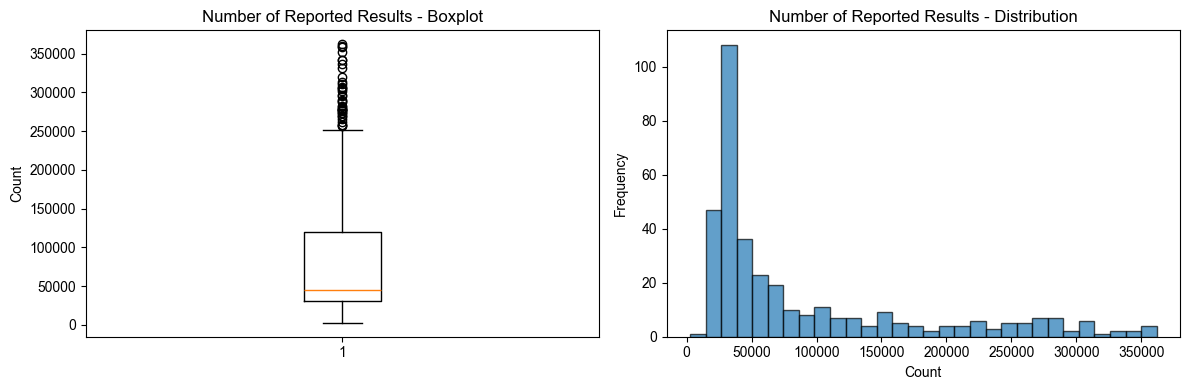

✅ 图表已保存至 figures/01_num_results_distribution.png


In [16]:
# 可视化报告结果数量分布
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 箱线图
axes[0].boxplot(df['num_results'].dropna())
axes[0].set_title('Number of Reported Results - Boxplot')
axes[0].set_ylabel('Count')

# 直方图
axes[1].hist(df['num_results'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Number of Reported Results - Distribution')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('figures/01_num_results_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ 图表已保存至 figures/01_num_results_distribution.png")

---
## 第三步：特征工程

### 3.1 时间特征提取
提取日期相关特征，用于分析时间趋势和季节性。

In [17]:
# 时间特征提取
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek  # 0=周一, 6=周日
df['dayofweek_name'] = df['date'].dt.day_name()
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

print("✅ 时间特征提取完成")
print(f"新增列: year, month, day, dayofweek, dayofweek_name, is_weekend, week_of_year")

✅ 时间特征提取完成
新增列: year, month, day, dayofweek, dayofweek_name, is_weekend, week_of_year


In [18]:
# 查看周末vs工作日的报告数量差异
print("📊 工作日 vs 周末 报告数量统计:")
print(df.groupby('is_weekend')['num_results'].agg(['mean', 'median', 'std', 'count']))

📊 工作日 vs 周末 报告数量统计:
               mean   median      std  count
is_weekend                                  
0          91999.34 45111.50 90737.21    256
1          88233.47 41785.00 85904.13    103


### 3.2 单词属性特征
根据题目要求，提取与单词难度相关的属性特征。

In [19]:
# 定义英语字母频率（基于大规模语料统计）
# 来源: https://en.wikipedia.org/wiki/Letter_frequency
LETTER_FREQ = {
    'E': 12.70, 'T': 9.06, 'A': 8.17, 'O': 7.51, 'I': 6.97,
    'N': 6.75, 'S': 6.33, 'H': 6.09, 'R': 5.99, 'D': 4.25,
    'L': 4.03, 'C': 2.78, 'U': 2.76, 'M': 2.41, 'W': 2.36,
    'F': 2.23, 'G': 2.02, 'Y': 1.97, 'P': 1.93, 'B': 1.49,
    'V': 0.98, 'K': 0.77, 'J': 0.15, 'X': 0.15, 'Q': 0.10,
    'Z': 0.07
}

# 元音字母集合
VOWELS = set('AEIOU')

def extract_word_features(word):
    """
    提取单词属性特征
    
    返回:
    - num_vowels: 元音数量
    - vowel_ratio: 元音占比
    - num_unique_letters: 不重复字母数
    - num_repeated_letters: 重复字母数（总字母数-不重复字母数）
    - has_repeated: 是否有重复字母
    - avg_letter_freq: 平均字母频率
    - min_letter_freq: 最小字母频率（稀有字母指标）
    - max_letter_freq: 最大字母频率
    - first_letter_freq: 首字母频率
    - last_letter_freq: 尾字母频率
    """
    word = word.upper()
    
    # 元音统计
    num_vowels = sum(1 for c in word if c in VOWELS)
    vowel_ratio = num_vowels / len(word)
    
    # 重复字母统计
    num_unique = len(set(word))
    num_repeated = len(word) - num_unique
    has_repeated = 1 if num_repeated > 0 else 0
    
    # 字母频率统计
    letter_freqs = [LETTER_FREQ.get(c, 0) for c in word]
    avg_freq = np.mean(letter_freqs)
    min_freq = np.min(letter_freqs)
    max_freq = np.max(letter_freqs)
    first_letter_freq = LETTER_FREQ.get(word[0], 0)
    last_letter_freq = LETTER_FREQ.get(word[-1], 0)
    
    return {
        'num_vowels': num_vowels,
        'vowel_ratio': vowel_ratio,
        'num_unique_letters': num_unique,
        'num_repeated_letters': num_repeated,
        'has_repeated': has_repeated,
        'avg_letter_freq': avg_freq,
        'min_letter_freq': min_freq,
        'max_letter_freq': max_freq,
        'first_letter_freq': first_letter_freq,
        'last_letter_freq': last_letter_freq
    }

# 测试函数
print("测试 'EERIE' 的特征:")
print(extract_word_features('EERIE'))

测试 'EERIE' 的特征:
{'num_vowels': 4, 'vowel_ratio': 0.8, 'num_unique_letters': 3, 'num_repeated_letters': 2, 'has_repeated': 1, 'avg_letter_freq': np.float64(10.212), 'min_letter_freq': np.float64(5.99), 'max_letter_freq': np.float64(12.7), 'first_letter_freq': 12.7, 'last_letter_freq': 12.7}


In [20]:
# 为所有单词提取特征
word_features = df['word'].apply(lambda x: pd.Series(extract_word_features(x)))
df = pd.concat([df, word_features], axis=1)

print("✅ 单词属性特征提取完成")
print(f"新增特征: {word_features.columns.tolist()}")

✅ 单词属性特征提取完成
新增特征: ['num_vowels', 'vowel_ratio', 'num_unique_letters', 'num_repeated_letters', 'has_repeated', 'avg_letter_freq', 'min_letter_freq', 'max_letter_freq', 'first_letter_freq', 'last_letter_freq']


In [21]:
# 查看单词特征的分布
print("📊 单词特征统计:")
df[['num_vowels', 'num_unique_letters', 'num_repeated_letters', 
    'avg_letter_freq', 'min_letter_freq']].describe()

📊 单词特征统计:


,num_vowels,num_unique_letters,num_repeated_letters,avg_letter_freq,min_letter_freq
count,359.00,359.00,359.00,359.00,359.00
mean,1.78,4.70,0.30,5.94,2.21
std,0.61,0.50,0.49,1.33,1.42
min,0.00,3.00,0.00,2.05,0.00
25%,1.00,4.00,0.00,5.08,1.49
50%,2.00,5.00,0.00,5.99,1.97
75%,2.00,5.00,1.00,6.81,2.41
max,3.00,6.00,2.00,9.79,6.75


### 3.3 目标变量构建
构建用于分析的目标变量：困难模式占比、平均猜测次数等。

In [22]:
# 计算困难模式占比
df['hard_mode_ratio'] = df['num_hard_mode'] / df['num_results']

# 计算平均猜测次数（加权平均，X按7次计算）
df['avg_tries'] = (
    df['try_1'] * 1 + 
    df['try_2'] * 2 + 
    df['try_3'] * 3 + 
    df['try_4'] * 4 + 
    df['try_5'] * 5 + 
    df['try_6'] * 6 + 
    df['try_x'] * 7  # X按7次失败计算
) / 100  # 百分比转换

# 计算失败率（X的百分比）
df['fail_rate'] = df['try_x']

print("✅ 目标变量构建完成")
print(f"新增列: hard_mode_ratio, avg_tries, fail_rate")

✅ 目标变量构建完成
新增列: hard_mode_ratio, avg_tries, fail_rate


In [23]:
# 查看目标变量分布
print("📊 目标变量统计:")
df[['hard_mode_ratio', 'avg_tries', 'fail_rate']].describe()

📊 目标变量统计:


,hard_mode_ratio,avg_tries,fail_rate
count,359.00,359.00,359.00
mean,0.08,4.19,2.80
std,0.05,0.39,4.12
min,0.01,3.10,0.00
25%,0.06,3.94,1.00
50%,0.08,4.17,2.00
75%,0.09,4.42,3.00
max,0.94,5.99,48.00


### 3.4 难度分级（初步）
基于平均猜测次数和失败率，对单词进行难度分级。

In [24]:
# 基于平均猜测次数的难度分级
def classify_difficulty(row):
    """
    难度分类标准（可根据数据分布调整）:
    - 简单: avg_tries < 3.7 且 fail_rate < 3%
    - 中等: 3.7 <= avg_tries < 4.2 或 3% <= fail_rate < 8%
    - 困难: avg_tries >= 4.2 或 fail_rate >= 8%
    """
    if row['avg_tries'] < 3.7 and row['fail_rate'] < 3:
        return 'Easy'
    elif row['avg_tries'] >= 4.2 or row['fail_rate'] >= 8:
        return 'Hard'
    else:
        return 'Medium'

df['difficulty'] = df.apply(classify_difficulty, axis=1)

print("📊 难度分布:")
print(df['difficulty'].value_counts())
print(f"\n难度占比:")
print(df['difficulty'].value_counts(normalize=True).round(3))

📊 难度分布:
difficulty
Hard      165
Medium    162
Easy       32
Name: count, dtype: int64

难度占比:
difficulty
Hard     0.46
Medium   0.45
Easy     0.09
Name: proportion, dtype: float64


---
## 第四步：探索性数据分析 (EDA)

### 4.1 时间趋势分析

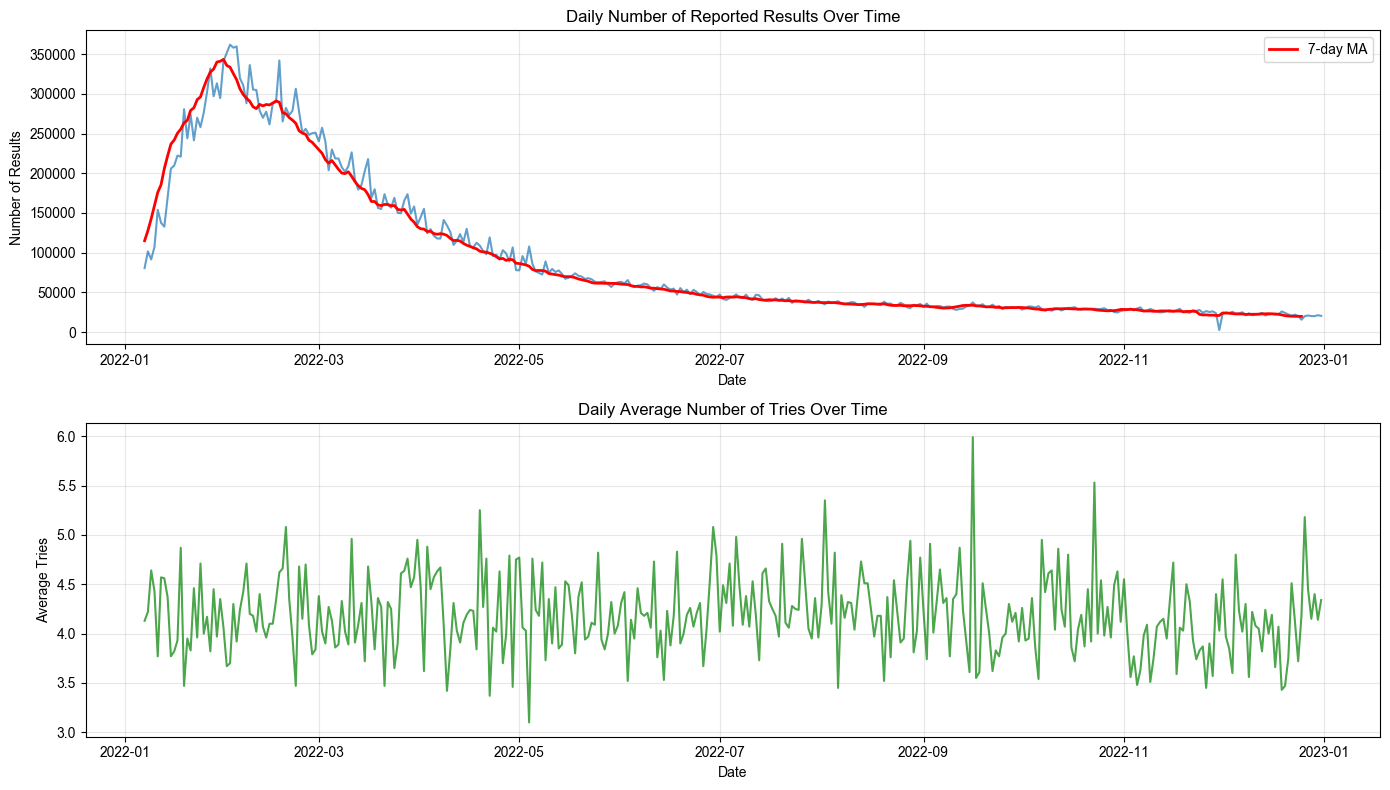

✅ 图表已保存至 figures/02_time_trends.png


In [25]:
import os
os.makedirs('figures', exist_ok=True)

# 绘制报告数量时间趋势
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# 报告数量趋势
axes[0].plot(df['date'], df['num_results'], alpha=0.7)
axes[0].set_title('Daily Number of Reported Results Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Results')
axes[0].grid(True, alpha=0.3)

# 添加移动平均线
df['num_results_ma7'] = df['num_results'].rolling(window=7).mean()
axes[0].plot(df['date'], df['num_results_ma7'], color='red', linewidth=2, label='7-day MA')
axes[0].legend()

# 平均猜测次数趋势
axes[1].plot(df['date'], df['avg_tries'], alpha=0.7, color='green')
axes[1].set_title('Daily Average Number of Tries Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Tries')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/02_time_trends.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ 图表已保存至 figures/02_time_trends.png")

### 4.2 相关性分析

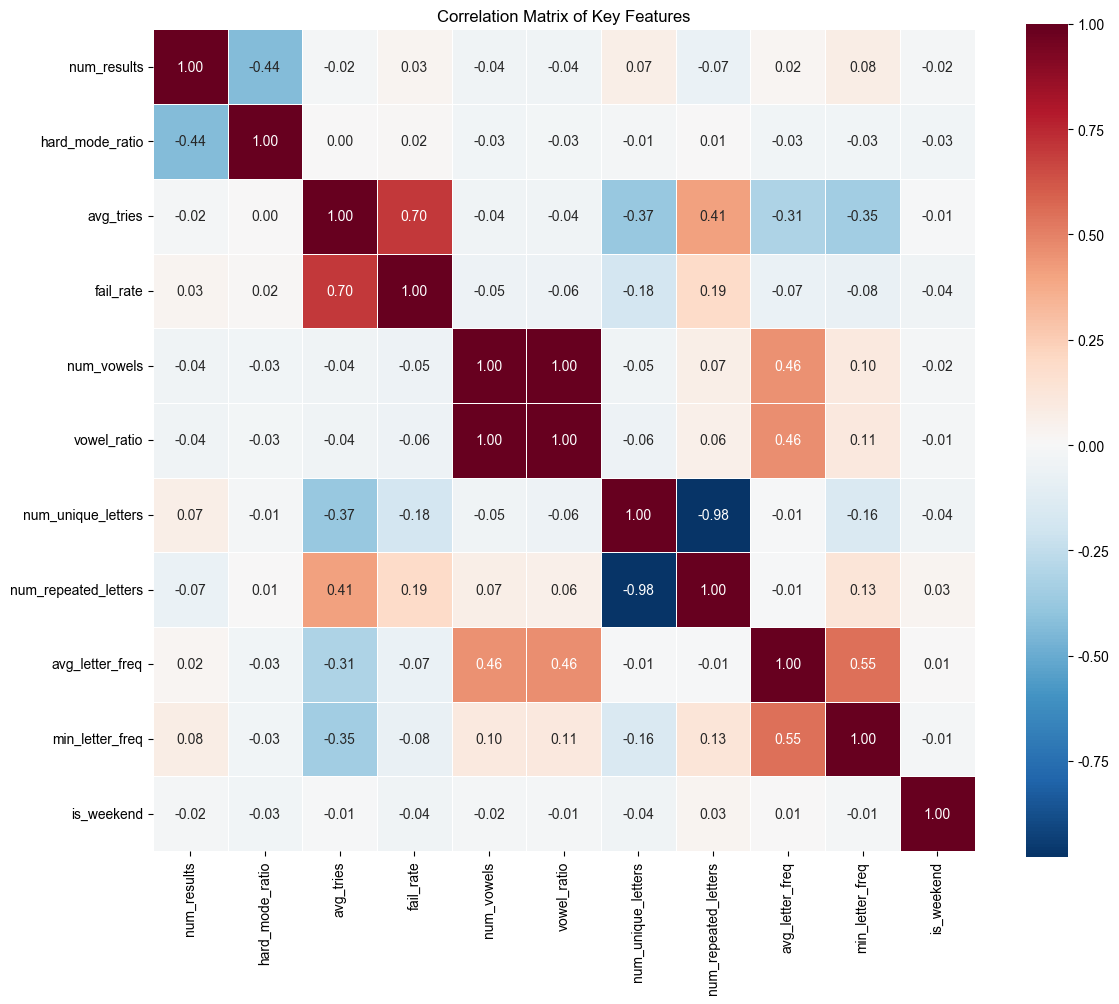

✅ 图表已保存至 figures/03_correlation_matrix.png


In [26]:
# 选择用于相关性分析的特征
corr_features = [
    'num_results', 'hard_mode_ratio', 'avg_tries', 'fail_rate',
    'num_vowels', 'vowel_ratio', 'num_unique_letters', 'num_repeated_letters',
    'avg_letter_freq', 'min_letter_freq', 'is_weekend'
]

# 计算相关性矩阵
corr_matrix = df[corr_features].corr()

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.savefig('figures/03_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ 图表已保存至 figures/03_correlation_matrix.png")

In [27]:
# 输出与目标变量相关性最高的特征
print("📊 与 avg_tries (难度) 相关性最高的特征:")
print(corr_matrix['avg_tries'].sort_values(key=abs, ascending=False)[1:6])

print("\n📊 与 hard_mode_ratio (困难模式占比) 相关性最高的特征:")
print(corr_matrix['hard_mode_ratio'].sort_values(key=abs, ascending=False)[1:6])

📊 与 avg_tries (难度) 相关性最高的特征:
fail_rate               0.70
num_repeated_letters    0.41
num_unique_letters     -0.37
min_letter_freq        -0.35
avg_letter_freq        -0.31
Name: avg_tries, dtype: float64

📊 与 hard_mode_ratio (困难模式占比) 相关性最高的特征:
num_results       -0.44
min_letter_freq   -0.03
is_weekend        -0.03
avg_letter_freq   -0.03
num_vowels        -0.03
Name: hard_mode_ratio, dtype: float64


### 4.3 猜测次数分布可视化

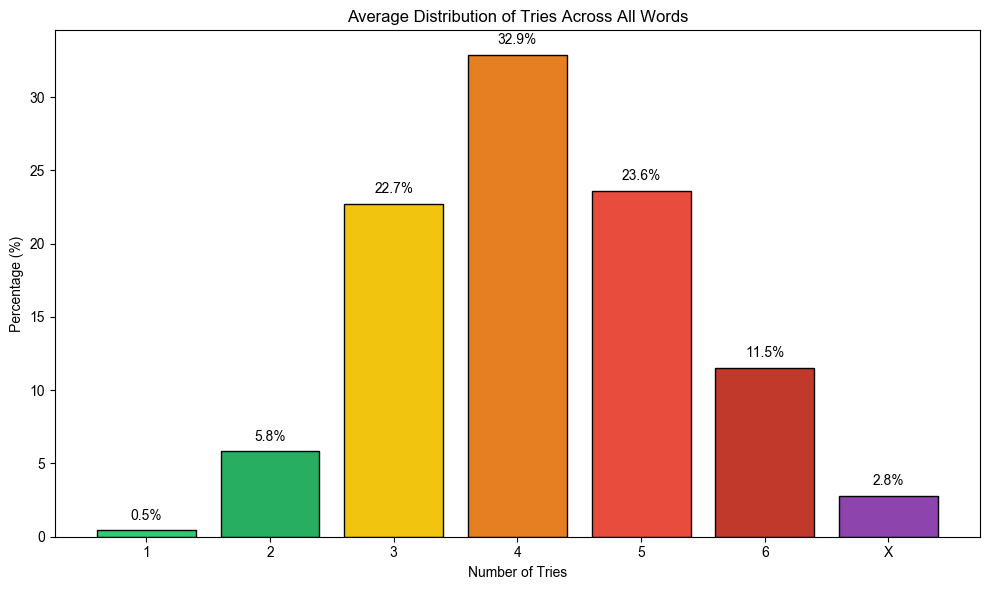

✅ 图表已保存至 figures/04_tries_distribution.png


In [28]:
# 绘制猜测次数分布
try_cols = ['try_1', 'try_2', 'try_3', 'try_4', 'try_5', 'try_6', 'try_x']
try_means = df[try_cols].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(['1', '2', '3', '4', '5', '6', 'X'], try_means.values, 
               color=['#2ecc71', '#27ae60', '#f1c40f', '#e67e22', '#e74c3c', '#c0392b', '#8e44ad'],
               edgecolor='black')
plt.title('Average Distribution of Tries Across All Words')
plt.xlabel('Number of Tries')
plt.ylabel('Percentage (%)')

# 添加数值标签
for bar, val in zip(bars, try_means.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('figures/04_tries_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ 图表已保存至 figures/04_tries_distribution.png")

---
## 第五步：数据验证与保存

In [29]:
# 最终数据验证
print("="*60)
print("📋 最终数据验证报告")
print("="*60)

# 数据形状
print(f"\n📏 数据形状: {df.shape[0]} 行 × {df.shape[1]} 列")

# 缺失值检查
missing_count = df.isnull().sum().sum()
print(f"\n⚠️ 总缺失值数: {missing_count}")

# 数据类型
print(f"\n📊 数据类型:")
print(df.dtypes.value_counts())

# 日期范围
print(f"\n📅 日期范围: {df['date'].min().strftime('%Y-%m-%d')} 至 {df['date'].max().strftime('%Y-%m-%d')}")

# 列名列表
print(f"\n📝 所有列名:")
print(df.columns.tolist())

📋 最终数据验证报告

📏 数据形状: 359 行 × 35 列

⚠️ 总缺失值数: 6

📊 数据类型:
float64           22
int64              5
int32              4
object             3
datetime64[ns]     1
Name: count, dtype: int64

📅 日期范围: 2022-01-07 至 2022-12-31

📝 所有列名:
['date', 'contest_number', 'word', 'num_results', 'num_hard_mode', 'try_1', 'try_2', 'try_3', 'try_4', 'try_5', 'try_6', 'try_x', 'pct_sum', 'year', 'month', 'day', 'dayofweek', 'dayofweek_name', 'is_weekend', 'week_of_year', 'num_vowels', 'vowel_ratio', 'num_unique_letters', 'num_repeated_letters', 'has_repeated', 'avg_letter_freq', 'min_letter_freq', 'max_letter_freq', 'first_letter_freq', 'last_letter_freq', 'hard_mode_ratio', 'avg_tries', 'fail_rate', 'difficulty', 'num_results_ma7']


In [30]:
# 查看最终数据样本
print("📊 处理后数据样本:")
df.head()

📊 处理后数据样本:


,date,contest_number,word,num_results,num_hard_mode,try_1,try_2,try_3,try_4,try_5,try_6,try_x,pct_sum,year,month,day,dayofweek,dayofweek_name,is_weekend,week_of_year,num_vowels,vowel_ratio,num_unique_letters,num_repeated_letters,has_repeated,avg_letter_freq,min_letter_freq,max_letter_freq,first_letter_freq,last_letter_freq,hard_mode_ratio,avg_tries,fail_rate,difficulty,num_results_ma7
0,2022-12-31,560,MANLY,20380,1899,0.00,2.00,17.00,37.00,29.00,12.00,2.00,99.00,2022,12,31,5,Saturday,1,52,1.00,0.20,5.00,0.00,0.00,4.67,1.97,8.17,2.41,1.97,0.09,4.34,2.00,Hard,NaN
1,2022-12-30,559,MOLAR,21204,1973,0.00,4.00,21.00,38.00,26.00,9.00,1.00,99.00,2022,12,30,4,Friday,0,52,2.00,0.40,5.00,0.00,0.00,5.62,2.41,8.17,2.41,5.99,0.09,4.14,1.00,Medium,NaN
2,2022-12-29,558,HAVOC,20001,1919,0.00,2.00,16.00,38.00,30.00,12.00,2.00,100.00,2022,12,29,3,Thursday,0,52,2.00,0.40,5.00,0.00,0.00,5.11,0.98,8.17,6.09,2.78,0.10,4.40,2.00,Hard,NaN
3,2022-12-28,557,IMPEL,20160,1937,0.00,3.00,21.00,40.00,25.00,9.00,1.00,99.00,2022,12,28,2,Wednesday,0,52,2.00,0.40,5.00,0.00,0.00,5.61,1.93,12.70,6.97,4.03,0.10,4.15,1.00,Medium,NaN
4,2022-12-27,556,CONDO,20879,2012,0.00,2.00,17.00,35.00,29.00,14.00,3.00,100.00,2022,12,27,1,Tuesday,0,52,2.00,0.40,4.00,1.00,1.00,5.76,2.78,7.51,2.78,7.51,0.10,4.45,3.00,Hard,NaN


In [31]:
# 删除临时列
cols_to_drop = ['pct_sum', 'num_results_ma7']
df_final = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 保存处理后的数据
df_final.to_csv('data_processed.csv', index=False)
print("✅ 数据已保存至 data_processed.csv")
print(f"📊 最终数据: {df_final.shape[0]} 行 × {df_final.shape[1]} 列")

✅ 数据已保存至 data_processed.csv
📊 最终数据: 359 行 × 33 列


---
## 预处理总结

### 数据概况
- **原始数据**: 2022年1月7日-12月31日的Wordle游戏数据
- **记录数**: 359条每日游戏记录

### 处理步骤
1. **数据清洗**: 列名标准化、日期格式转换、单词大写化
2. **数据验证**: 缺失值检查、重复值检查、百分比总和验证
3. **特征工程**:
   - 时间特征: year, month, dayofweek, is_weekend等
   - 单词属性: 元音数、重复字母数、字母频率等
   - 目标变量: hard_mode_ratio, avg_tries, fail_rate
4. **初步分析**: 难度分级、相关性分析

### 关键发现（待补充）
运行完notebook后记录:
- 数据质量情况
- 与难度相关的关键特征
- 时间趋势特点

### 后续建模任务
1. 报告结果数量预测模型（时间序列）
2. 单词属性与困难模式占比关联模型
3. 结果分布预测模型
4. 单词难度分类模型